The dataset used is part of the [HDSC-Introduction-to-Python-for-machine-learning project](https://github.com/HamoyeHQ/HDSC-Introduction-to-Python-for-machine-learning) by **HamoyeHQ**. It is a project that aims to help aspiring data professionals kickstart their careers by working with datasets from the Food and Agriculture Organization (FAO) of the United Nations.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
url = 'https://github.com/HamoyeHQ/HDSC-Introduction-to-Python-for-machine-learning/files/7768140/FoodBalanceSheets_E_Africa_NOFLAG.csv'
data = pd.read_csv(url, encoding='latin-1')
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [3]:
# Check for number of rows and columns
data.shape

(60943, 12)

In [4]:
# check for missing values
data.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [5]:
# view summary of the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [6]:
# Percentage of missing data
data.isnull().count()

Area Code       60943
Area            60943
Item Code       60943
Item            60943
Element Code    60943
Element         60943
Unit            60943
Y2014           60943
Y2015           60943
Y2016           60943
Y2017           60943
Y2018           60943
dtype: int64

In [7]:
# Summary statistics
data.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


**What is the mean and standard deviation across the whole dataset for the year 2017 to 2 decimal places?**

In [8]:
# Mean and standard deviation across the whole dataset in 2017.
mean = data['Y2017'].mean()

std = data['Y2017'].std()

print(f'Mean for Year 2017: {round(mean, 3)}')

print(f'Standard Deviation for Year 2017: {round(std, 3)}')

Mean for Year 2017: 140.918
Standard Deviation for Year 2017: 1671.862


**What is the total number and percentage of missing data in 2014 to 3 decimal places?**

In [9]:
# Total number and Percentage of missing data in 2014
null_2014 = data['Y2014'].isnull().sum()
total_2014 = len(data['Y2014'])
null_percent = (null_2014/total_2014) * 100

print(f'Total missing data: {null_2014} \nPercent of missing data: {round(null_percent, 3)}')

Total missing data: 1589 
Percent of missing data: 2.607


In [10]:
# Total sum of each `Element` per year
data.groupby('Element').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


**What is the total number of the sum of `"Processing"` in 2017?**

In [11]:
# total number of the sum of Processing in 2017
proc_2017 = data.groupby('Element').sum().loc['Processing']['Y2017']
print(f'Total number of the sum of Processing in 2017 is {round(proc_2017, 2)}')

Total number of the sum of Processing in 2017 is 292836.0


In [12]:
# total number of the sum of Processing in 2018
proc_2018 = data.groupby('Element').sum().loc['Processing']['Y2018']
print(f'Total number of the sum of Processing in 2017 is {round(proc_2018, 2)}')

Total number of the sum of Processing in 2017 is 308429.0


**What year has the highest sum of `"Stock Variation"`?**

In [13]:
# Highest sum of Stock variation
stock_largest = data.groupby('Element').sum().loc['Stock Variation'][3:8].nlargest()
print('Highest sum of Stock Variation:', stock_largest)

Highest sum of Stock Variation: Y2014    58749.83
Y2017    54316.91
Y2015    34910.99
Y2016    33140.12
Y2018    20577.91
Name: Stock Variation, dtype: float64


**Which year had the least correlation with `"Element Code"`?**

In [14]:
# Correlation
data.corr()['Element Code'].sort_values(ascending=False)

Element Code    1.000000
Y2014           0.024457
Y2018           0.024279
Y2017           0.024254
Y2015           0.023889
Y2016           0.023444
Area Code      -0.000209
Item Code      -0.024683
Name: Element Code, dtype: float64

ANS: The Year with the least correlation with `"Element Code"`: **2016**

**What is the total `"Protein supply quantity"` in `"Madagascar"` in 2015?**

In [15]:
# Total Protein Supply Quantity in 2015
data.set_index('Area').loc['Madagascar'].groupby('Element')[['Y2015']].sum()

,Y2015
Element,
Domestic supply quantity,31214.98
Export Quantity,494.75
Fat supply quantity (g/capita/day),91.85
Feed,2070.22
Food,21120.65
Food supply (kcal/capita/day),7685.00
Food supply quantity (kg/capita/yr),871.59
Import Quantity,1721.80
Losses,2176.00


ANS: The total `"Protein supply quantity"` in Madagascar in 2015 is **173.05**.

In [16]:
# The sum of each `Item` per year
data.groupby(['Item']).sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,,,,
"Alcohol, Non-Food",38447,752497,1515090,2403.00,2180.00,2223.00,2348.00,2293.00
Alcoholic Beverages,75016,1649136,2171381,102410.11,98783.72,96958.75,95581.06,97847.27
Animal Products,18060,397035,90990,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,85279,1882494,2567303,209460.54,200675.72,183314.22,269617.53,269648.27
Apples and products,69280,1352989,1920418,9499.23,10559.15,9853.26,10198.90,9640.51
...,...,...,...,...,...,...,...,...
"Vegetables, Other",77779,1518715,2275409,155038.96,158104.08,156218.90,157752.59,163987.21
Vegetal Products,18060,391905,90990,107145.19,107064.17,106792.72,107655.20,107775.39
Wheat and products,87073,1639683,2654934,232670.13,234710.51,239377.07,240047.62,242645.19


**What is the total sum of `"Wine"` produced in 2015 and 2018 respectively?**

In [17]:
# Total Sum of Wine produced in 2015 and 2018
wine_2015 = data.groupby('Item')[['Y2015', 'Y2018']].sum().loc['Wine'][0]

wine_2018 = data.groupby('Item')[['Y2015', 'Y2018']].sum().loc['Wine'][1]

print(f'Total sum of Wine produced in 2015: {round(wine_2015, 2)}')

print(f'Total sum of Wine produced in 2018: {round(wine_2018, 2)}')

Total sum of Wine produced in 2015: 4251.81
Total sum of Wine produced in 2018: 4039.32


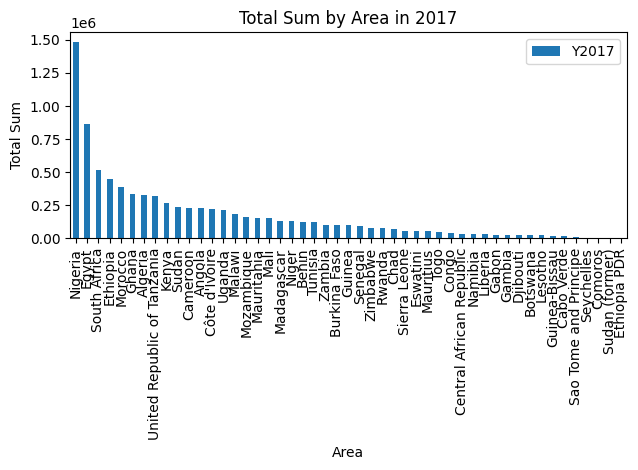

In [18]:
# Plot bar chart of the Total sum according to 'Area' in 2017
data.groupby("Area")[["Y2017"]].sum().sort_values(by="Y2017", ascending=False).plot.bar()

# Add labels and title
plt.xlabel("Area")
plt.ylabel("Total Sum")
plt.title("Total Sum by Area in 2017")
plt.tight_layout()

# Show the plot
plt.show()

**Which of these Areas had the highest sum in 2017?**

In [19]:
# Area with the highest sum in 2017
data.groupby('Area')[['Y2017']].sum().sort_values(by='Y2017', ascending=False).iloc[0]

Y2017    1483268.23
Name: Nigeria, dtype: float64

**Which of these Areas had the 7th lowest sum in 2017?**

In [20]:
data.groupby('Area')[['Y2017']].sum().sort_values(by='Y2017', ascending=False).iloc[-7]

Y2017    19102.77
Name: Guinea-Bissau, dtype: float64

**What is the total number of unique countries in the dataset?**

In [21]:
data['Area'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Egypt',
       'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'South Africa', 'Sudan', 'Sudan (former)', 'Togo', 'Tunisia',
       'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [22]:
num_countries = data['Area'].nunique()
print('Number of Unique Countries:', num_countries)

Number of Unique Countries: 49
